In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Training
df_train = pd.read_csv("./diabetes_train.csv")

# Test
df_test = pd.read_csv("./diabetes_test.csv")

## Remove Outliers

In [3]:
# Training
df_train_filter = df_train[(df_train['age'] > 0) & (df_train['bmi'] < 70)].copy().reset_index(drop=True)
print("Età minima training:", min(df_train_filter['age']))
print("Bmi massima training:", max(df_train_filter['bmi']))
print("Record eliminati training:", len(df_train)-len(df_train_filter))
print()

# Test
df_test_filter = df_test.loc[(df_test['age'] > 0) & (df_test['bmi'] < 70)].copy().reset_index(drop=True)
print("Età minima test:", min(df_test_filter['age']))
print("Bmi massima test:", max(df_test_filter['bmi']))
print("Record eliminati test:", len(df_test)-len(df_test_filter))


Età minima training: 0.08
Bmi massima training: 50.03
Record eliminati training: 2

Età minima test: 0.4
Bmi massima test: 48.6269055251518
Record eliminati test: 1


## Missing Values

In [4]:
# Training
df_train_filter = df_train_filter.fillna(df_train_filter.mean(numeric_only=True))

# Test
df_test_filter = df_test_filter.fillna(df_test_filter.mean(numeric_only=True))

## Encoding gender

In [5]:
# Training
df_train_filter['gender'] = df_train_filter['gender'].map({'Male': 1, 'Female': 0})

# Test
df_test_filter['gender'] = df_test_filter['gender'].map({'Male': 1, 'Female': 0})

## One-Hot encoding smoking info

In [6]:
# Training
df_train_oh = pd.get_dummies(df_train_filter)
df_train_oh.drop(columns=["smoking_history_No Info"], inplace=True)
display(df_train_oh)

# Test
df_test_oh = pd.get_dummies(df_test_filter)
df_test_oh.drop(columns=["smoking_history_No Info"], inplace=True)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,64.822537,0,0,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1,False,False,False,True,False
1,1,59.912290,1,0,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1,False,False,False,True,False
2,1,67.853267,0,0,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1,False,False,True,False,False
3,1,57.985607,0,0,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1,False,False,False,True,False
4,1,70.278133,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,19.354174,0,0,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0,False,False,True,False,False
582,0,70.000000,0,0,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0,False,False,False,False,True
583,1,60.000000,0,1,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0,True,False,False,False,False
584,0,27.000000,0,0,27.320000,6.000000,200.000000,0.801057,5464.000000,60.704415,0,False,False,False,False,False


## Standardization and PCA

In [7]:
# Dividing feature and target
X_train = df_train_oh.drop(columns=["diabetes"])
X_test = df_test_oh.drop(columns=["diabetes"])
y_train = df_train_oh["diabetes"] 
y_test = df_test_oh["diabetes"]

# Dividing real vs other columns
binary_columns = X_train.columns[X_train.applymap(lambda x: x in [0, 1]).all()]
numeric_columns = X_train.drop(columns=binary_columns).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]
X_train_cat = X_train.drop(columns=numeric_columns)
X_test_cat = X_test.drop(columns=numeric_columns)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_train_combined = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_columns), X_train_cat], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_columns), X_test_cat], axis=1)

C:\Users\fabio\AppData\Local\Temp\ipykernel_23100\193348796.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_columns = X_train.columns[X_train.applymap(lambda x: x in [0, 1]).all()]


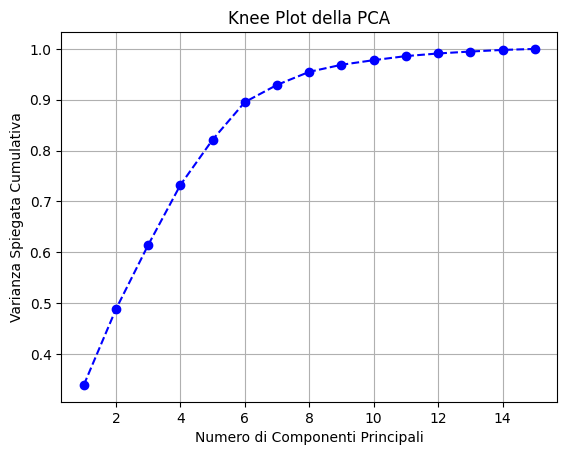

In [8]:
pca_plot = PCA()
pca_plot.fit(X_train_combined)

# Calcola la varianza spiegata cumulativa
explained_variance_ratio = np.cumsum(pca_plot.explained_variance_ratio_)

# Crea il knee plot
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Knee Plot della PCA')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.grid(True)
plt.show()

In [11]:
# PCA
pca_data = PCA(n_components=0.98)
X_train_pca = pca_data.fit_transform(X_train_combined)
X_test_pca = pca_data.transform(X_test_combined)

# Convertiamo in DataFrame
df_train_scal = pd.DataFrame(X_train_combined)
df_train_pca = pd.DataFrame(X_train_pca)
df_test_scal = pd.DataFrame(X_test_combined)
df_test_pca = pd.DataFrame(X_test_pca)
display(df_train_pca)

,0,1,2,3,4,5,6,7,8,9,10
0,0.516577,0.581565,-1.293712,0.555812,0.338073,-0.016919,0.263632,0.775764,-0.001285,0.093130,-0.184193
1,1.332313,0.324736,-0.913523,0.366581,0.977476,1.092716,0.258927,0.679401,0.090024,-0.058157,0.689411
2,2.826880,1.774646,0.491542,-0.557070,0.699485,-0.159206,-0.474581,-0.309423,0.569338,0.111191,-0.105210
3,1.440264,1.189147,-0.941857,0.232810,0.835513,1.351133,0.268824,0.581495,0.005959,0.068984,-0.269161
4,1.726601,-0.182012,0.715243,0.905662,0.284309,0.143763,-0.881565,0.045228,-0.648605,0.434532,-0.076334
...,...,...,...,...,...,...,...,...,...,...,...
581,-0.333568,-0.152194,0.414634,-0.754408,-0.979420,0.240309,-0.145364,-0.731599,0.648552,0.235200,0.027880
582,-0.265992,-2.190876,-0.673803,0.412687,0.598500,-1.941921,0.016791,-0.445458,-0.227610,-0.640434,-0.220107
583,0.143695,-0.814605,0.984708,0.103743,1.281623,-0.640865,-0.755937,0.085019,-0.522533,0.458459,0.080896
584,0.315422,0.271610,1.208977,-1.120682,-0.530030,-0.230110,0.193862,-0.553179,-0.135613,-0.197722,0.022692


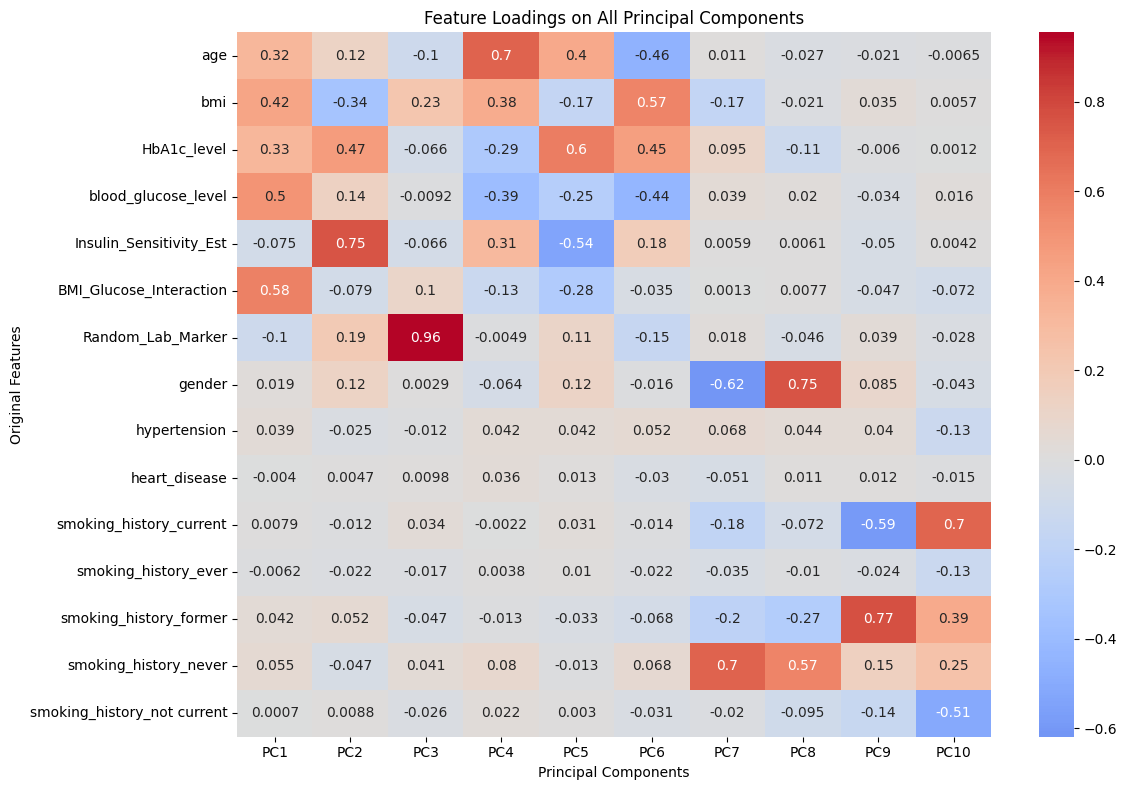

In [10]:
loadings = pd.DataFrame(pca_data.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca_data.n_components_)],
                        index=X_train_combined.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Loadings on All Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.tight_layout()
plt.show()